# `snell_example_v1.ipynb`

### Notebook with example code for transforming images

In [13]:
import snell
import matplotlib.pyplot as plt
import numpy as np
import tifffile
from skimage.transform import downscale_local_mean, rescale

%matplotlib notebook
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Initialize display variables using class constructor

In [2]:
display = snell.snell(config = 'flat', dispres = 2000, dispcm = 2, ddisp = 0.5, dadw = 10)

#### Create spatial lookup table for this virtual display configuration

In [3]:
display.make_display()

/home/twd/Dropbox/snell/snell_tool/snell.py:77: RuntimeWarning: invalid value encountered in arcsin
  theta_prime = np.arcsin(self.nw*np.sin(theta_)/self.na)
/home/twd/Dropbox/snell/snell_tool/snell.py:118: RuntimeWarning: invalid value encountered in true_divide
  unit_x = x_cm/d_cm
/home/twd/Dropbox/snell/snell_tool/snell.py:119: RuntimeWarning: invalid value encountered in true_divide
  unit_y = y_cm/d_cm


#### Load in and transform some example images

#### Gratings:

In [4]:
OMR_air = tifffile.imread('./examples/example_grating.tif')
OMR_snell = display.transform_image(OMR_air,smooth=False,stochastic=5)

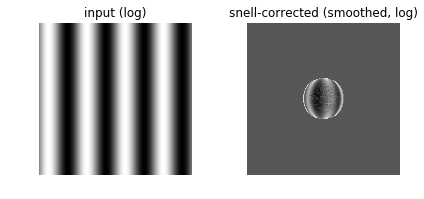

In [5]:
plt.figure()
plt.subplot(121)
plt.imshow(np.log(OMR_air),cmap='gray',interpolation='none')
plt.title('input (log)')
plt.axis('off')
plt.subplot(122)
plt.imshow(OMR_snell,cmap='gray',interpolation='none')
plt.title('snell-corrected (smoothed, log)')
plt.axis('off')
plt.tight_layout()

In [6]:
aa = downscale_local_mean(OMR_snell, (8, 8))

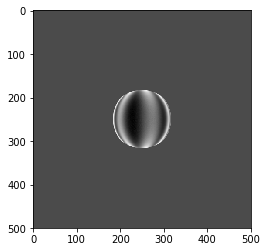

In [7]:
plt.figure()
plt.imshow(aa,cmap='gray')

#### Checkered circle:

In [6]:
check_air = tifffile.imread('example_checker.tif')
check_snell = display.transform_image(check_air)

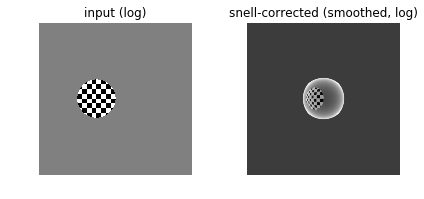

In [7]:
plt.figure()
plt.subplot(121)
plt.imshow(np.log(check_air),cmap='gray',interpolation='none')
plt.title('input (log)')
plt.axis('off')
plt.subplot(122)
plt.imshow(check_snell,cmap='gray',interpolation='none')
plt.title('snell-corrected (smoothed, log)')
plt.axis('off')
plt.tight_layout()

#### Checkered circle, lighter background:

In [8]:
check_air = tifffile.imread('example_checker_lighterbg.tif')
check_snell = display.transform_image(check_air)

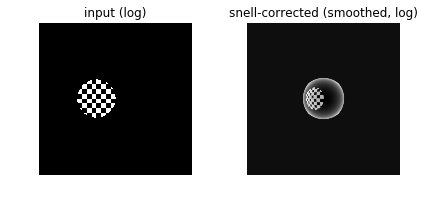

In [9]:
plt.figure()
plt.subplot(121)
plt.imshow(np.log(check_air),cmap='gray',interpolation='none')
plt.title('input (log)')
plt.axis('off')
plt.subplot(122)
plt.imshow(check_snell,cmap='gray',interpolation='none')
plt.title('snell-corrected (smoothed, log)')
plt.axis('off')
plt.tight_layout()

#### Checkered circle, dark background, with stimulus completely inside Snell window:

In [8]:
check_air = tifffile.imread('./examples/example_check_inwindow.tif')
check_snell = display.transform_image(check_air,smooth=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1099.5, 1099.5, -0.5)

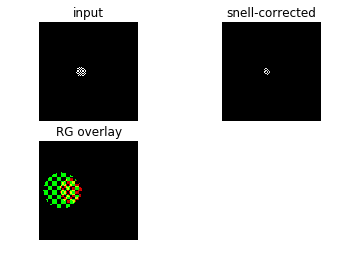

In [11]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(check_snell,cmap='gray',interpolation='none')
plt.title('snell-corrected')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = check_snell/np.max(check_snell)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg[1450:2550,1450:2550],cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')
#plt.tight_layout()

#### Initialize data structure for performing inverse transformations

In [9]:
display.init_inverse_transform()

#### Perform inverse transform

In [10]:
inverse = display.inverse_transform_image(check_air,smooth=False)

<IPython.core.display.Javascript object>


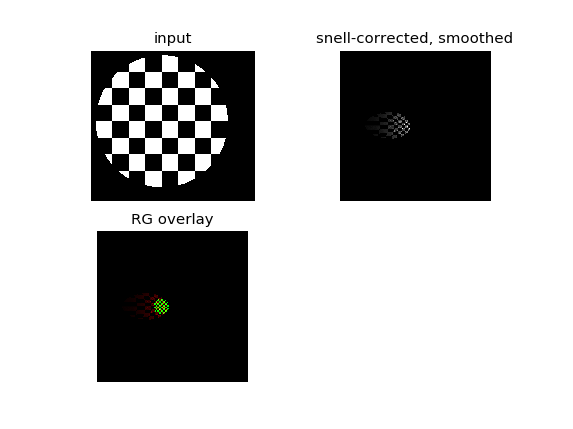

(-0.5, 3998.5, 3998.5, -0.5)

In [20]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse,cmap='gray',interpolation='none')
plt.title('snell-corrected, smoothed')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = inverse/np.max(inverse)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

In [16]:
bb = rescale(downscale_local_mean(inverse, (8, 8)),8)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


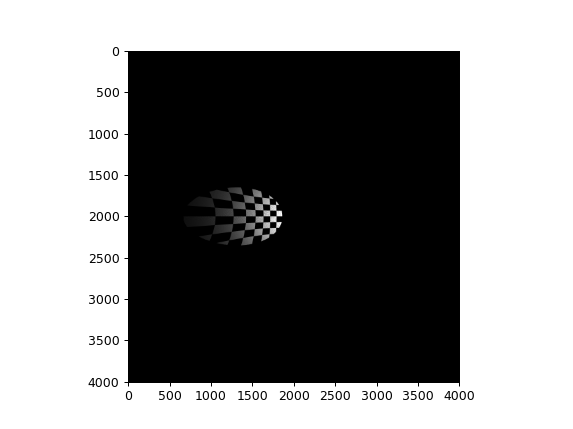

In [17]:
plt.figure()
plt.imshow(bb,cmap='gray')

In [27]:
check_air.shape

(3999, 3999)

In [24]:
display.fresdisplay.shape

(3999, 3999)

In [28]:
t = display.transform_image(bb[:-1,:-1],smooth=False)
t = downscale_local_mean(t, (8, 8))

In [ ]:
rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = inverse/np.max(inverse)
rg[:,:,1] = check_air/np.max(check_air)

In [35]:
np.max(np.log(check_air))

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


4.0

In [32]:
np.max(t)

3.96405106153581

<IPython.core.display.Javascript object>


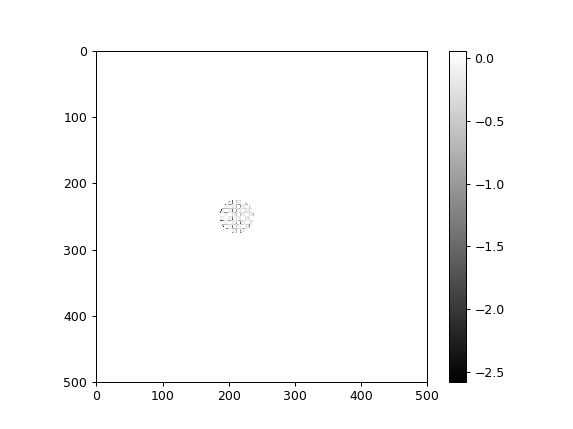

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [40]:
plt.figure()
plt.imshow(t-np.log(downscale_local_mean(check_air,(8,8))),cmap='gray')
plt.colorbar()